In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

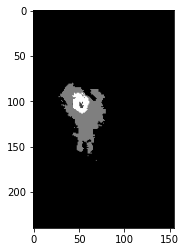

In [2]:
img = cv2.imread('../data/Outdir/BraTS20_Training_002/88.png')
plt.imshow(img)

In [3]:
import btseg.transformers as t

transforms = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.Resize(proportion_scale=True, g_measure=700),
    t.RegionSelection(region=1),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
    t.MinimumBoundingBox()
])

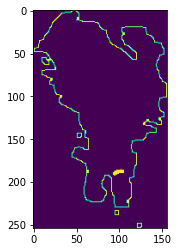

In [4]:
transformed_img = transforms(img)
plt.imshow(transformed_img)

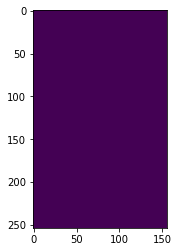

In [5]:
ref = np.zeros_like(transformed_img)
plt.imshow(ref)

In [9]:
contours, _ = cv2.findContours(transformed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
contours

[array([[[121, 248]],
 
        [[121, 253]],
 
        [[125, 253]],
 
        [[126, 252]],
 
        [[126, 248]]], dtype=int32),
 array([[[ 95, 233]],
 
        [[ 95, 238]],
 
        [[ 99, 238]],
 
        [[ 99, 233]]], dtype=int32),
 array([[[ 51, 143]],
 
        [[ 51, 148]],
 
        [[ 55, 148]],
 
        [[ 56, 147]],
 
        [[ 56, 143]]], dtype=int32),
 array([[[ 45,   0]],
 
        [[ 43,   2]],
 
        [[ 37,   2]],
 
        [[ 36,   3]],
 
        [[ 33,   3]],
 
        [[ 22,  14]],
 
        [[ 22,  16]],
 
        [[ 21,  17]],
 
        [[ 21,  18]],
 
        [[ 19,  20]],
 
        [[ 19,  22]],
 
        [[ 18,  23]],
 
        [[ 18,  24]],
 
        [[ 13,  29]],
 
        [[ 13,  31]],
 
        [[ 12,  32]],
 
        [[ 12,  33]],
 
        [[ 11,  34]],
 
        [[ 10,  34]],
 
        [[  9,  35]],
 
        [[  7,  35]],
 
        [[  7,  38]],
 
        [[  6,  39]],
 
        [[  6,  42]],
 
        [[  5,  43]],
 
        [[  4,  43]],
 
 

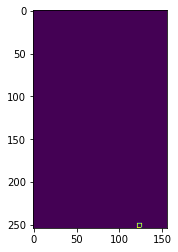

In [10]:
cv2.drawContours(ref, contours, 0, 255, 1)
plt.imshow(ref)

In [8]:
contours, _ = cv2.findContours(img_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours

NameError: name 'img_bw' is not defined

In [183]:
out = img.copy()

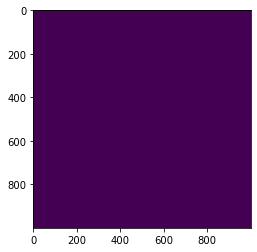

In [184]:
ref = np.zeros_like(img_bw)
plt.imshow(ref)

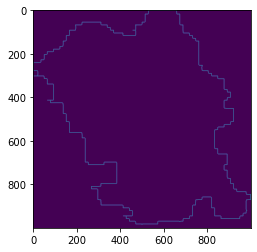

In [185]:
cv2.drawContours(ref, contours, 0, 255, 1)
# for contour in contours:
#     ref = cv2.polylines(ref, [contour], False, (0, 255, 0), 3) 
plt.imshow(ref)

In [186]:
contours

[array([[[529,   0]],
 
        [[529,   1]],
 
        [[529,   2]],
 
        ...,
 
        [[532,   0]],
 
        [[531,   0]],
 
        [[530,   0]]], dtype=int32)]

In [187]:
# M = cv2.moments(contours[0])
M = cv2.moments(ref)

centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

# print(centroid_x)
# print(centroid_y)

In [188]:
width = img.shape[1]
height = img.shape[0]

print(width)
print(height)

1000
1000


In [189]:
N = 360
distances = []
import math

In [190]:
for i in np.arange(0, N, 1):
    tmp = np.zeros_like(img_bw)

    theta = i*(360/N)
    print(theta)
    theta *= np.pi/180.0

    cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

    (row, col) = np.nonzero(np.logical_and(tmp, ref))

    print(row)
    print(col)

    cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
    
    distance = math.sqrt(
        ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
    )
    distances.append(distance)


0.0
[518 519 520 521 522 523 524 524 524 524 524 524 524 524 524 524 524 524
 524 524 524 524 524 524 524 524 524 524 524 524 524 524 524 524]
[905 905 905 905 905 905 878 879 880 881 882 883 884 885 886 887 888 889
 890 891 892 893 894 895 896 897 898 899 900 901 902 903 904 905]
1.0
[511 511 511 511 511 511 511 511 511 512 512 512 512 513 514 515 516 517]
[911 912 913 914 915 916 917 918 919 907 908 909 910 906 905 905 905 905]
2.0
[504 505 506 507 508 509 510]
[919 919 919 919 919 919 919]
3.0
[497 498 499 500 501 502 503]
[919 919 919 919 919 919 919]
4.0
[490 491 492 493 494 495 496]
[919 919 919 919 919 919 919]
5.0
[483 484 485 486 487 488 489]
[919 919 919 919 919 919 919]
6.0
[476 477 478 479 480 481 482]
[919 919 919 919 919 919 919]
7.0
[470 471 472 473 474 475 476]
[919 919 919 919 919 919 919]
8.0
[462 463 464 465 466 467 468]
[919 919 919 919 919 919 919]
9.0
[455 456 457 458 459 460 461]
[919 919 919 919 919 919 919]
10.0
[451 451 451 451 451 451 451 451 451 451 451 451 

100.0
[117 117 117 117 117 117 117 117]
[450 451 452 453 454 455 456 457]
101.0
[117 117 117 117 117 117 117]
[443 444 445 446 447 448 449]
102.0
[117 117 117 117 117 117 117]
[436 437 438 439 440 441 442]
103.0
[117 117 117 117 117 117 117]
[429 430 431 432 433 434 435]
104.0
[117 117 117 117 117 117 117]
[421 422 423 424 425 426 427]
105.0
[105 105 105 106 107 108 109 110 111 112 113 115 116 117 117 117 117 117
 117 117]
[410 411 412 412 412 412 412 412 412 412 412 413 413 414 415 416 417 418
 419 420]
106.0
[105 105 105 105 105 105 105 105]
[402 403 404 405 406 407 408 409]
107.0
[105 105 105 105 105 105 105 105]
[394 395 396 397 398 399 400 401]
108.0
[105 105 105 105 105 105 105 105]
[386 387 388 389 390 391 392 393]
109.0
[105 105 105 105 105 105 105 105]
[378 379 380 381 382 383 384 385]
110.0
[ 92  92  92  92  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 105 105 105 105 105]
[365 366 367 368 369 369 369 369 369 369 369 369 369 369 369 369 370 371
 372 373 374 375 376

195.0
[594 595 596 597 598 599 600 601]
[239 239 239 239 239 239 239 239]
196.0
[600 601 602 603 604 605 606]
[239 239 239 239 239 239 239]
197.0
[605 606 607 608 609 610 611]
[239 239 239 239 239 239 239]
198.0
[611 612 613 614 615 616 617]
[239 239 239 239 239 239 239]
199.0
[616 617 618 619 620 621 622 623]
[239 239 239 239 239 239 239 239]
200.0
[622 623 624 625 626 627 628]
[239 239 239 239 239 239 239]
201.0
[628 629 630 631 632 633 634]
[239 239 239 239 239 239 239]
202.0
[633 634 635 636 637 638 639 640]
[239 239 239 239 239 239 239 239]
203.0
[639 640 641 642 643 644 645]
[239 239 239 239 239 239 239]
204.0
[645 646 647 648 649 650 651]
[239 239 239 239 239 239 239]
205.0
[651 652 653 654 655 656 657 658]
[239 239 239 239 239 239 239 239]
206.0
[657 658 659 660 661 662 663 664]
[239 239 239 239 239 239 239 239]
207.0
[663 664 665 666 667 668 669 670]
[239 239 239 239 239 239 239 239]
208.0
[670 671 672 673 674 675 676 677]
[239 239 239 239 239 239 239 239]
209.0
[676 677 678 6

297.0
[919 920 921 922 923 924 925 926 927 928 929 930 931 932 933]
[731 731 731 731 731 731 731 731 731 731 731 731 731 731 731]
298.0
[902 903 904 905 906 907 908 909 910 911 912 913 914 915]
[731 731 731 731 731 731 731 731 731 731 731 731 731 731]
299.0
[894 894 895 896 897 898 899]
[734 735 733 732 731 731 731]
300.0
[894 894 894 894 894 894 894 894]
[737 738 739 740 741 742 743 744]
301.0
[881 882 883 884 885 886 887 888 889 890 891 892 893 894]
[745 745 745 745 745 745 745 745 745 745 745 745 745 745]
302.0
[870 871 872 873 874 875 876 877 878 879 880]
[747 746 746 746 746 746 746 746 746 745 746]
303.0
[870 870 870 870 870 870 870 870]
[748 749 750 751 752 753 754 755]
304.0
[869 869 869 869 869 869 869 869]
[756 757 758 759 760 761 762 763]
305.0
[869 869 869 869 869 869 869 869]
[765 766 767 768 769 770 771 772]
306.0
[860 861 862 863 864 865 866 867 868 869 940 941 942 943 944 944 944 944]
[775 775 775 775 775 775 775 774 774 774 833 833 833 833 833 834 835 836]
307.0
[857 8

In [191]:
distances

[380.01184192074857,
 386.12951195162486,
 394.3665807342199,
 394.73028766488136,
 395.2176615486712,
 395.82824558133797,
 396.56147064484213,
 397.2870498770379,
 398.39302202724383,
 399.4896744598038,
 382.4604554721965,
 359.2881851661699,
 359.5622338344226,
 360.91134645505394,
 362.60446770551516,
 364.156559737704,
 379.68407920269715,
 382.6878623630491,
 400.6607043372235,
 402.9342378105886,
 405.664886328605,
 395.5363447270048,
 395.0012658207566,
 393.66229181876184,
 385.7473266271589,
 388.7029714319148,
 392.20657822122257,
 395.37956446938426,
 399.60230229567,
 402.995037190286,
 406.1231340369568,
 394.1218085820677,
 385.32324092896346,
 386.0738271367278,
 386.9392717210286,
 377.107411754264,
 368.2078217528791,
 369.42387578498494,
 371.5400382193015,
 363.7609104892938,
 366.0737630587584,
 366.9795634636894,
 359.54693713060607,
 352.9660040287166,
 350.03571246374275,
 354.9788726107513,
 362.86223281019477,
 363.78565117387467,
 357.76109346881196,
 361.73

In [192]:
len(distances)

360

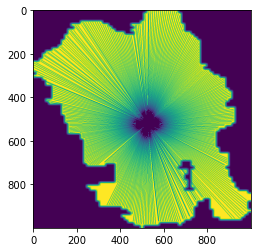

In [193]:
plt.imshow(out)

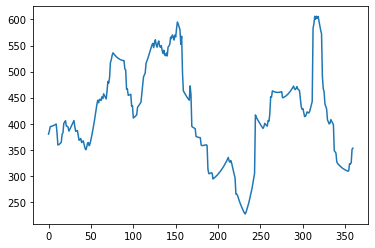

In [194]:
plt.plot(np.arange(0, N, 1), distances)

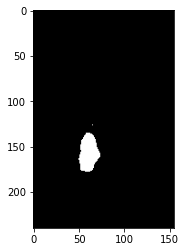

In [12]:
import cv2
import btseg.transformers as t
import matplotlib.pyplot as plt

img = cv2.imread('../data/Outdir/BraTS20_Training_094/154.png')
plt.imshow(img)

700 452.0833333333333


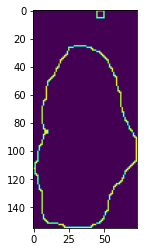

In [13]:
transforms = t.Compose([
        t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
        t.Resize(proportion_scale=True, g_measure=700),
        t.RegionSelection(region=1),
        t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
        t.CannyEdge(threshold_1=50, threshold_2=100),
        t.Dilate(kernel=None, iterations=1),
        t.Erode(kernel=None, iterations=1),
        t.MinimumBoundingBox(),
        
])

transformed_img = transforms(img)
plt.imshow(transformed_img)

In [14]:
contours, _ = cv2.findContours(transformed_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours

[array([[[ 29,  25]],
 
        [[ 28,  26]],
 
        [[ 27,  26]],
 
        [[ 26,  26]],
 
        [[ 25,  26]],
 
        [[ 25,  27]],
 
        [[ 25,  28]],
 
        [[ 24,  29]],
 
        [[ 24,  30]],
 
        [[ 23,  31]],
 
        [[ 22,  32]],
 
        [[ 21,  33]],
 
        [[ 20,  34]],
 
        [[ 19,  35]],
 
        [[ 19,  36]],
 
        [[ 19,  37]],
 
        [[ 18,  38]],
 
        [[ 18,  39]],
 
        [[ 17,  40]],
 
        [[ 16,  41]],
 
        [[ 16,  42]],
 
        [[ 16,  43]],
 
        [[ 15,  44]],
 
        [[ 15,  45]],
 
        [[ 14,  46]],
 
        [[ 13,  47]],
 
        [[ 12,  48]],
 
        [[ 11,  49]],
 
        [[ 10,  50]],
 
        [[ 10,  51]],
 
        [[ 10,  52]],
 
        [[ 10,  53]],
 
        [[  9,  54]],
 
        [[  9,  55]],
 
        [[  9,  56]],
 
        [[  9,  57]],
 
        [[  9,  58]],
 
        [[  9,  59]],
 
        [[  9,  60]],
 
        [[  9,  61]],
 
        [[  9,  62]],
 
        [[  8,  

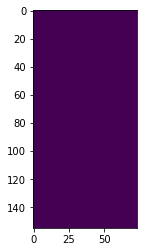

In [15]:
import numpy as np
ref = np.zeros_like(transformed_img)
plt.imshow(ref)

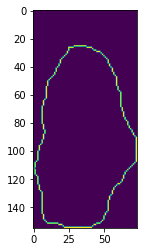

In [16]:
cv2.drawContours(ref, contours, 0, 255, 1)
# for contour in contours:
#     ref = cv2.polylines(ref, [contour], False, (0, 255, 0), 3) 
plt.imshow(ref)

In [17]:
M = cv2.moments(ref)
centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

In [18]:
width = transformed_img.shape[1]
height = transformed_img.shape[0]

print(width)
print(height)

74
155


In [19]:
N = 360
distances = []
import math
out = img.copy()

In [20]:
for i in np.arange(0, N, 1):
    tmp = np.zeros_like(transformed_img)

    theta = i*(360/N)
    theta *= np.pi/180.0

    cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

    (row, col) = np.nonzero(np.logical_and(tmp, ref))

    cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
    
    distance = math.sqrt(
        ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
    )
    distances.append(distance)

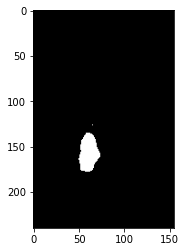

In [21]:
plt.imshow(out)

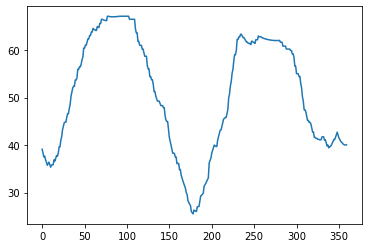

In [11]:
plt.plot(np.arange(0, N, 1), distances)